In [26]:
%load_ext autoreload
%autoreload 2
import chainertools
import os
import glob
import chainer
chainertools.init()
import shufflenet_v2
import settings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%time
data = chainertools.openimages.load_openimages_datasets(root=settings.openimages_directory)

INFO:chainertools.openimages:openimages: creating label encoder


[Memory]29.2s, 0.5min   : Loading openimages_dataset...
[Memory]136.1s, 2.3min  : Loading openimages_dataset...
CPU times: user 1min 40s, sys: 6.79 s, total: 1min 47s
Wall time: 1min 49s


In [13]:
net = shufflenet_v2.ShuffleNetV2(1.5, len(data.label_names))
model = chainertools.train.create_model_with_loss(net, chainer.links.Classifier, chainer.functions.sigmoid_cross_entropy,
                                                  accuracy_fun=None)
chainertools.train.lr_find(model, data, batch_size=128,
                           lr_variable='alpha',
                           optimizer=chainer.optimizers.Adam(),
                           use_validation=True,
                           out=os.path.join(settings.log_directory, 'lr_find_snv2-x1.5'))

INFO:chainertools.train:accuracy_fun not passed, disabling accuracy
INFO:chainertools.train:lr_find: output directory: /home/paperspace/logs/lr_find_snv2-x1.5_batch128_Adam


iteration   elapsed_time  alpha       main/loss   validation/main/loss
1           3.51482       1e-07       0.711798    0.692887              
2           4.60365       1.20226e-07  0.712044    0.692842              
3           6.25548       1.44544e-07  0.712044    0.692967              
4           7.35537       1.7378e-07  0.71179     0.693239              
5           8.44556       2.0893e-07  0.711541    0.693636              
6           9.48597       2.51189e-07  0.711737    0.694167              
7           10.5574       3.01995e-07  0.711748    0.694732              
8           11.6358       3.63078e-07  0.711857    0.695497              
9           12.6934       4.36516e-07  0.71156     0.696079              
10          13.7193       5.24807e-07  0.711706    0.696681              
11          14.8153       6.30957e-07  0.711391    0.697544              
12          15.8661       7.58578e-07  0.711517    0.698277              
13          16.9602       9.12011e-07  0.711

64          75.8958       0.0109648   0.345505    61.2117               


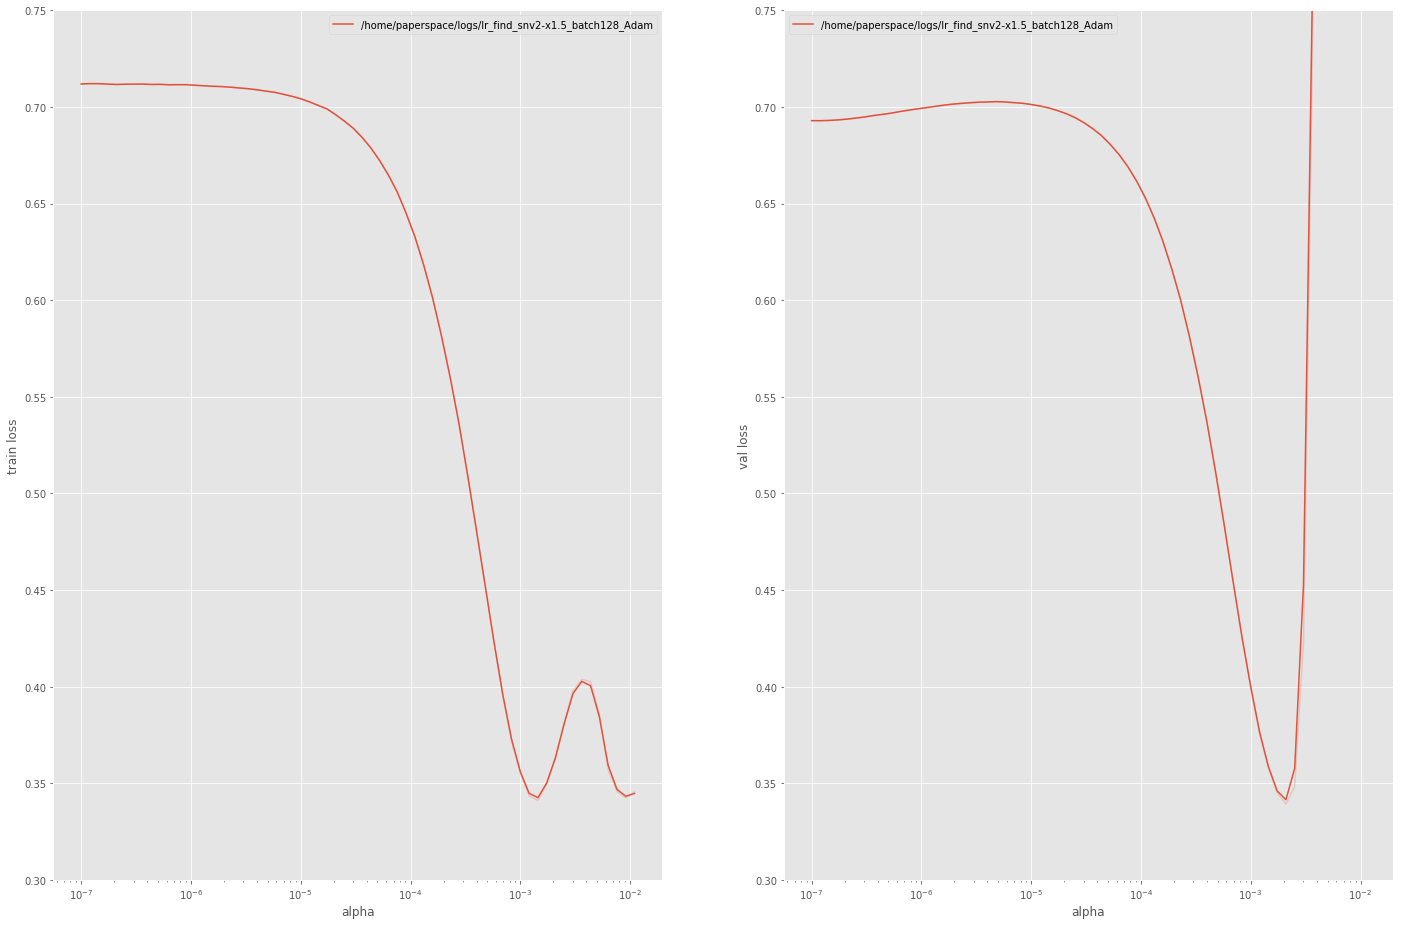

In [27]:
fig, axes = chainertools.plot.plot(glob.glob(os.path.join(settings.log_directory, 'lr_find*batch128*Adam*')),
                      ys=['loss'],
                      x='alpha',
                      y_range="train,val",
                      q_range=0.)
for ax in axes[0]:
    ax.set_xscale("log")
    ax.set_ylim((0.3, 0.75))

In [ ]:
# alpha=10-3 seems a nice choice